# Classification - Classify Edible and Poisonous Mushroom

---

## 1.0 Objectives

- To identify mushroom is edible or poisonous
- To find most indicative feature for a poisonous mushroom

## 2.0 Dataset Information

### 2.1 Description

This dataset includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family Mushroom drawn from The Audubon Society Field Guide to North American Mushrooms (1981). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like "leaflets three, let it be'' for Poisonous Oak and Ivy.

### 2.2 Data Dictionary

- classes: edible=e, poisonous=p
- cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
- cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
- cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y
- bruises: bruises=t,no=f
- odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s
- gill-attachment: attached=a,descending=d,free=f,notched=n
- gill-spacing: close=c,crowded=w,distant=d
- gill-size: broad=b,narrow=n
- gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y
- stalk-shape: enlarging=e,tapering=t
- stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?
- stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
- stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
- stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
- stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
- veil-type: partial=p,universal=u
- veil-color: brown=n,orange=o,white=w,yellow=y
- ring-number: none=n,one=o,two=t
- ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z
- spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y
- population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y
- habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

### 2.3 Acknowledgement & Source

Link to Dataset Repository: [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Mushroom)  

---

## 3.0 Import Library and Load Dataset

In [1]:
# Enable graph in jupyter notebook
%matplotlib inline

# EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
# Preprocessing
from sklearn.model_selection import train_test_split

# Building Model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegressionCV

# Metrics
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import roc_curve, roc_auc_score

In [3]:
df = pd.read_csv('mushrooms.csv')

## 4.0 Setting Graph Style

In [4]:
plt.rcParams["figure.figsize"] = (6, 3)
plt.rcParams['figure.dpi'] = 150
sns.set_style("white")

## 5.0 Statistics Summary of Dataset

In [5]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [6]:
df.describe().T

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

# 6.0 Preprocessing

## 6.1 Data Cleaning

In [8]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

From above information, we get to know that this dataset been cleaned and does not contain any missing value. It is 

### 6.2 Dealing with Categorical Data

In [9]:
df.nunique()

class                        2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64

In [10]:
two_classes_col = df.nunique()[df.nunique() == 2].index.tolist()
more_two_classes_col = df.nunique()[df.nunique() != 2].index.tolist()

In [11]:
df[two_classes_col] = df[two_classes_col].astype('category')

for col in two_classes_col:
    df[col] = df[col].cat.codes

In [12]:
df_more_two_classes_encoded = pd.get_dummies(df[more_two_classes_col], drop_first=True)

In [13]:
final_df = pd.concat([df_more_two_classes_encoded, df[two_classes_col]],axis=1) 

## 7.0 Building Model

### 7.1 Splitting dataset into training and testing set

In [14]:
df = final_df.copy()

In [15]:
X = df.drop(['class'], axis=1)
y = df['class']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Feature scaling is not required since all the feature is categorical and had been encoded as 0 or 1 to represent the features. Label encoding and one-hot encoding had used to encoded the categorical features.

In [21]:
log_clf = LogisticRegression()
svc_clf = SVC()
rfc_clf = RandomForestClassifier()

In [30]:
metrics = pd.DataFrame(columns=['Model', 'TN', 'FP', 'FN', 'TP', 'Precision Score', 'Recall Score'])

In [33]:
for clf in (log_clf, svc_clf, rfc_clf):
    y_train_pred = cross_val_predict(log_clf, X_train, y_train, cv=5)
    cm = confusion_matrix(y_train, y_train_pred)
    
    new_row = {
        'Model': clf.__class__.__name__,
        'TN': cm[0][0],
        'FP': cm[0][1],
        'FN': cm[1][0],
        'TP': cm[1][1],
        'Precision Score': precision_score(y_train, y_train_pred),
        'Recall Score': precision_score(y_train, y_train_pred)
    }
    
    metrics = metrics.append(new_row, ignore_index=True)

In [34]:
metrics

,TN,FP,FN,TP,Precision Score,Recall Score,Model
0,3365,0,3,3131,1.0,1.0,LogisticRegression
1,3365,0,3,3131,1.0,1.0,SVC
2,3365,0,3,3131,1.0,1.0,RandomForestClassifier


Since the above three model reported back the same metrics, it makes no make no difference to choose one model over another one. Any model will be suitable in this sceneario. Final decision is to use logistic regression.  

Logistic regression model in Scikit-learn library already got class that incorporated the cross validation function which is called LogisticRegressionCV. We can straightaway use this model to find the best parameters for the model itself.

In [37]:
log_clf = LogisticRegressionCV(random_state=112)

log_clf.fit(X_train, y_train)

LogisticRegressionCV(random_state=112)

In [38]:
y_pred = log_clf.predict(X_test)

## 8.0 Model Evaluation

In [39]:
confusion_matrix(y_test, y_pred)

array([[843,   0],
       [  0, 782]])

- True Negative: 843  
- False Positive: 0  
- False Negative: 0
- True Positive: 782

In [46]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

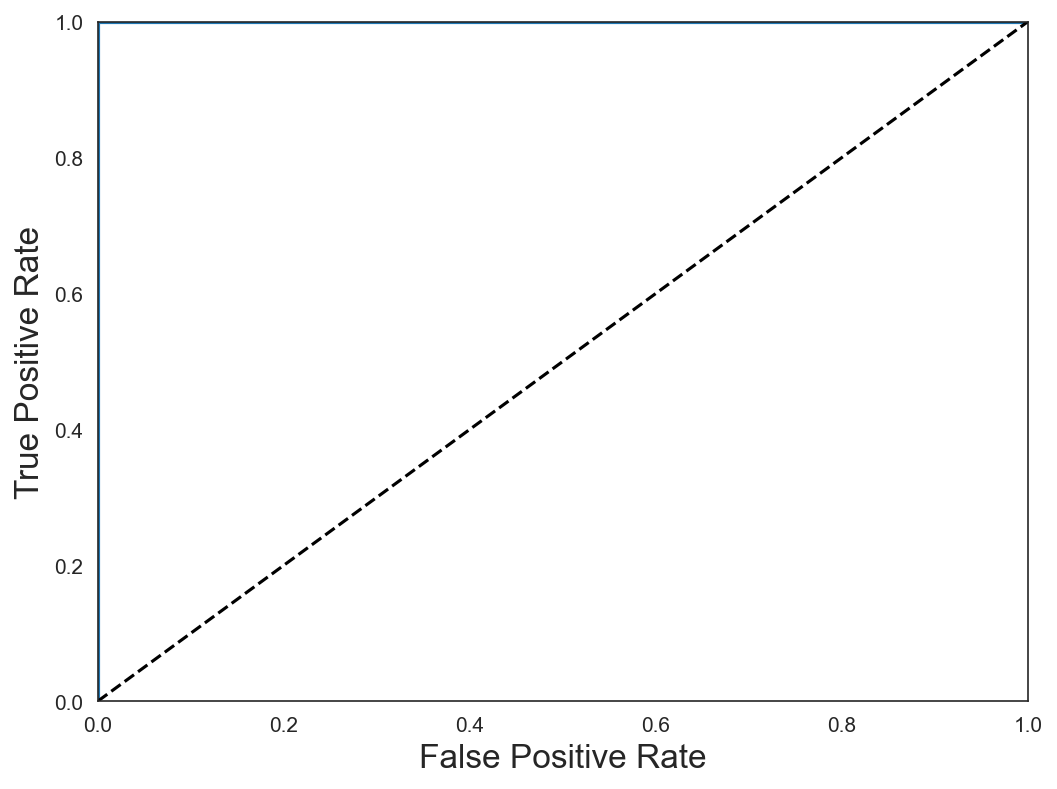

In [47]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.show()

In [48]:
roc_auc_score(y_test, y_pred)

1.0

## 9.0 Conclusion

In summary, the logistic regression model work splendidly, the area under curve of the ROC curve is 1.0. This interpret that the model predict 100% correctly for all the test case in this dataset. Despite having such anomaly high accuracy, we still need to be aware the dataset that the model train on is relatively small. In future, having a large dataset we can retrain on the model. The uttermost is to having a high recall score because the model is used to classify either the mushroom edible or poisonous. With the precision/recall trade-off theory, the model can sacrifice the false positive score and increase the false negative to prevent any people to consume a mushroom that is poisonous.